In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

# NFT Trader Cohort Analysis

- Does there exist a subset of NFT traders who consistently trade better than the population?
- Is their trade footprint observable?
- What are they buying at the moment?

In [2]:
import requests
import time
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [4]:
import sys

sys.path.append("~/sol-data-tools")
from src.nft_data import solscan_api

### Get Top Collections by 7D Trade Vol

In [5]:
df = solscan_api.get_top_collections_df()
df["collection"].fillna("BAD METADATA", inplace=True)

In [6]:
df.head()

,success,data,dex,totalItems,volume,floorPrice,lastTrade,totalAttributes,_id,collectionId,avatar,collection,creators,family,createdTime
0,True,"{'_id': '61b11ef3288738783a4b6f94', 'collectio...","[alphaart, digitaleyes, magiceden, solanart, s...",9995,17211.619953,999999999,"[{'_id': '626140ee131be11be8ebcd5d', 'mint': '...",12,61b11ef3288738783a4b6f94,45841b3efa6e5714aca4617a340cbfcf69fc1398589e6c...,https://arweave.net/T1urp9g2WlIGsxTwP-kywIBhA7...,Aurorian,[{'address': '9vwYtcJsH1MskNaixcjgNBnvBDkTBhyg...,NaN,NaN
1,True,"{'_id': '61b6c3398f8b70f759d1a2e7', 'collectio...","[alphaart, magiceden, solanart, solsea]",7498,16446.963985,2500000000,"[{'_id': '625f0fc2131be11be8ebc696', 'mint': '...",8,61b6c3398f8b70f759d1a2e7,a38e8d9d1a16b625978803a7d4eb512bc20ff880c8fd6c...,https://metadata.degods.com/g/8532.png,DeGods,[{'address': '9MynErYQ5Qi6obp4YwwdoDmXkZ1hYVtP...,Godplex,NaN
2,True,"{'_id': '625ab8ca2e6c0bc7d07be36e', 'collectio...",[magiceden],4415,15739.360618,1002039280,"[{'_id': '625f1a3c131be11be8ebc99a', 'mint': '...",10,625ab8ca2e6c0bc7d07be36e,fa11a3d3dcc9391575ffb4a4c37b34ddb4311b85cace56...,https://www.arweave.net/cDWkYcBd4vZwXXAGwLaxcY...,Smoke Heads,[{'address': 'BYqiPS8eiRuSmTsBcKGts986uMDQDYPY...,Original SmokeHeads,1.650113e+09
3,True,"{'_id': '61b0bfa9288738783ae13c1a', 'collectio...","[alphaart, digitaleyes, magiceden, solanart]",9998,13226.176834,150000000,"[{'_id': '625f199f131be11be8ebc96e', 'mint': '...",13,61b0bfa9288738783ae13c1a,2709009b28cbf61d994e184116172b69712fea2007f0d0...,https://www.arweave.net/nT1wxOXn8EQoQS69YiAv1D...,Grim Syndicate,[{'address': 'DnP3GRVqtR9vjxMZH4PcFuGZ4ZqhbNqo...,Grim Syndicate,NaN
4,True,"{'_id': '625994d12e6c0bc7d0e6b5b6', 'collectio...","[magiceden, solanart, solsea]",2150,13142.303052,1190000000,"[{'_id': '625f194e131be11be8ebc94d', 'mint': '...",9,625994d12e6c0bc7d0e6b5b6,6b56f059ed508d13c46d496a27e38d72dd1406db0af61c...,https://www.arweave.net/NknEWryTltRKHhlzzXT3vL...,Bushido Society,[{'address': '6V2xr7gPGGXkN1SRCjCpNJDoitMG7NA9...,NaN,1.650038e+09


In [7]:
collection_ids = df.set_index("collection")["collectionId"].to_dict()

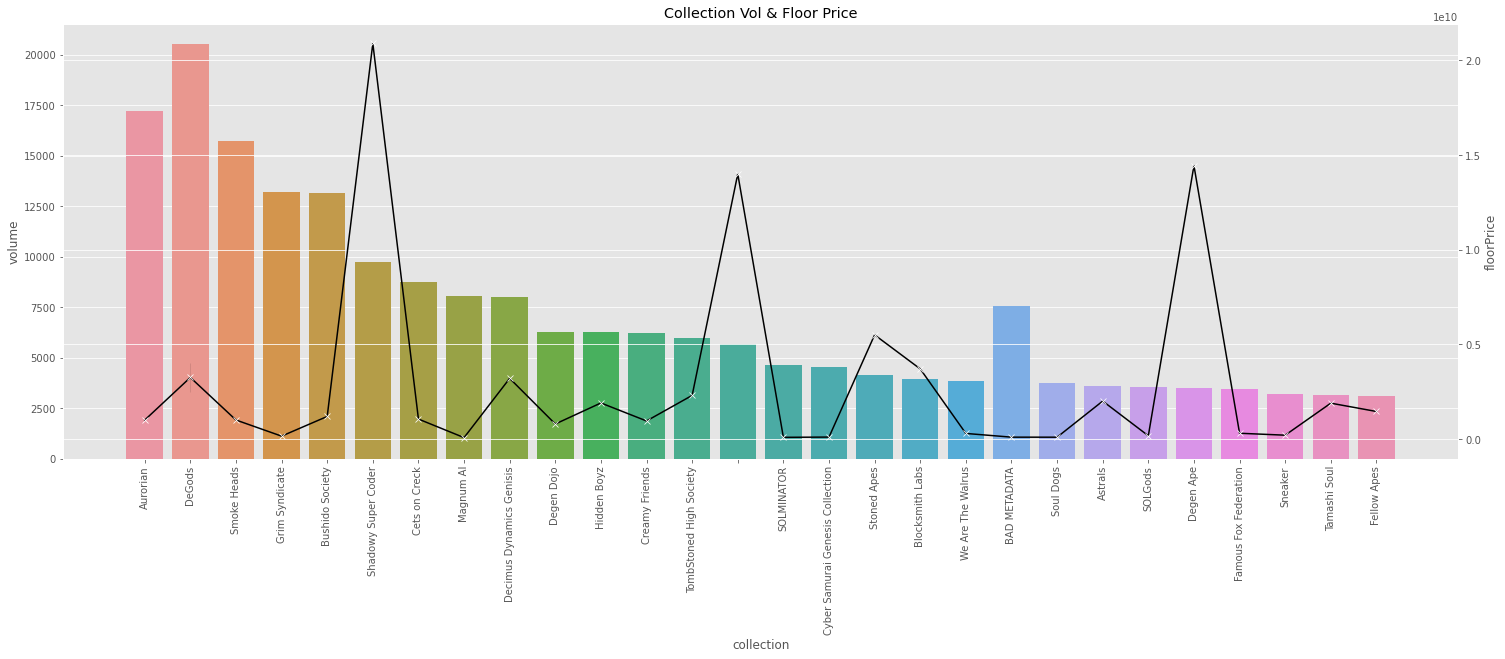

In [8]:
fig, ax = plt.subplots(figsize=(25, 8))
g = sns.barplot(data=df.head(30), x="collection", y="volume", estimator=np.sum, ci=None)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

ax2 = ax.twinx()

g = sns.lineplot(
    data=df.head(30),
    x="collection",
    y="floorPrice",
    marker="x",
    sort=False,
    ax=ax2,
    color="black",
)
g.set_title("Collection Vol & Floor Price")

pass

### Get Trades for Each Collection

In [9]:
trade_master = pd.DataFrame()
for k, v in tqdm.tqdm(collection_ids.items()):
    _df = solscan_api.get_collection_trades_df(v)
    trade_master = trade_master.append(_df, ignore_index=True)

100%|██████████| 431/431 [35:37<00:00,  4.96s/it]


In [10]:
# Cache data
# trade_master.to_pickle("data/trade_master_df.pkl")

In [11]:
# 1.18 Million Trades
trade_master.drop_duplicates(subset=["buyer", "signature"], inplace=True)
trade_master.shape

(1181642, 16)

In [12]:
trade_master.head(2)

,_id,mint,name,symbol,buyer,seller,price,collection,collectionId,tradeTime,dex,signature,image,attributes,family,fammily
0,626140ee131be11be8ebcd5d,7atqSiAJhf36dXDWzhoRQ4iiRMha2zXZ2x4kdui2RWNc,Aurorian #4627,AUROR,GMvos7NyqaPnbikT6w4Bg27o3eWvhksocyWNK8ttouPj,7HCG4GpiG7k8etVNa1HiZHwSg4WbY92LoBDHRSHSgADy,60.0,Aurorian,45841b3efa6e5714aca4617a340cbfcf69fc1398589e6c...,2022-04-21 11:32:35,solanart,4sKw9n5cM9KmAf1rEXKuseruJ2BLMWHJYz6y95sPA2haB6...,https://arweave.net/JYuX5q-Zlcra4PczWhSS8IEiqS...,"[{'trait_type': 'Background', 'value': 'Soft B...",NaN,NaN
1,626140eb131be11be8ebcd5b,76JRncYATBr8UUg5mpfdQWXr9ir57CwaK2RPJPcnpNbQ,Aurorian #6458,AUROR,GMvos7NyqaPnbikT6w4Bg27o3eWvhksocyWNK8ttouPj,49iPx1EJ9dpgVky4xBhpP8LNUXZaQ5ryGeboTAq1jpXC,60.0,Aurorian,45841b3efa6e5714aca4617a340cbfcf69fc1398589e6c...,2022-04-21 11:32:34,solanart,MoiihbwZvXkg5csSKzdCzqBSt47JYWjP9gLhGTApr8ohMk...,https://arweave.net/cbe2mTtPMunx45UDom2KgDSwzl...,"[{'trait_type': 'Background', 'value': 'Base B...",NaN,NaN


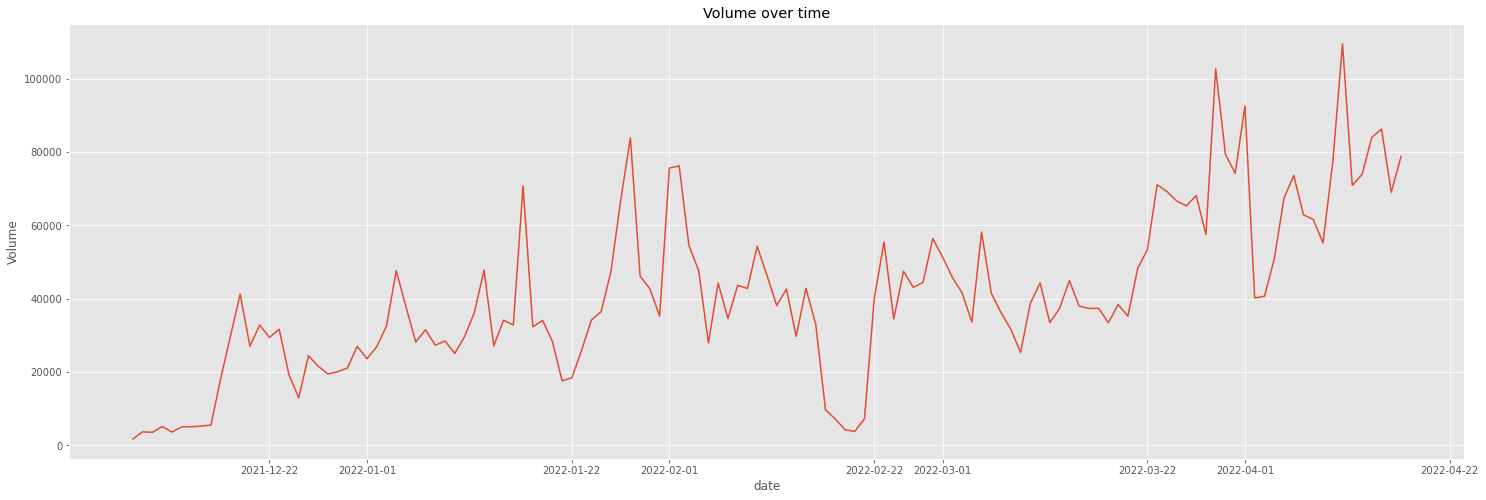

In [13]:
fig, ax = plt.subplots(figsize=(25, 8))

df_plot = trade_master.copy()
df_plot["date"] = df_plot["tradeTime"].dt.date
df_plot = df_plot.groupby("date")["price"].sum().reset_index().iloc[:-5]
g = sns.lineplot(
    data=df_plot,
    x="date",
    y="price",
)
g.set_title("Volume over time")
g.set_ylabel("Volume")
pass

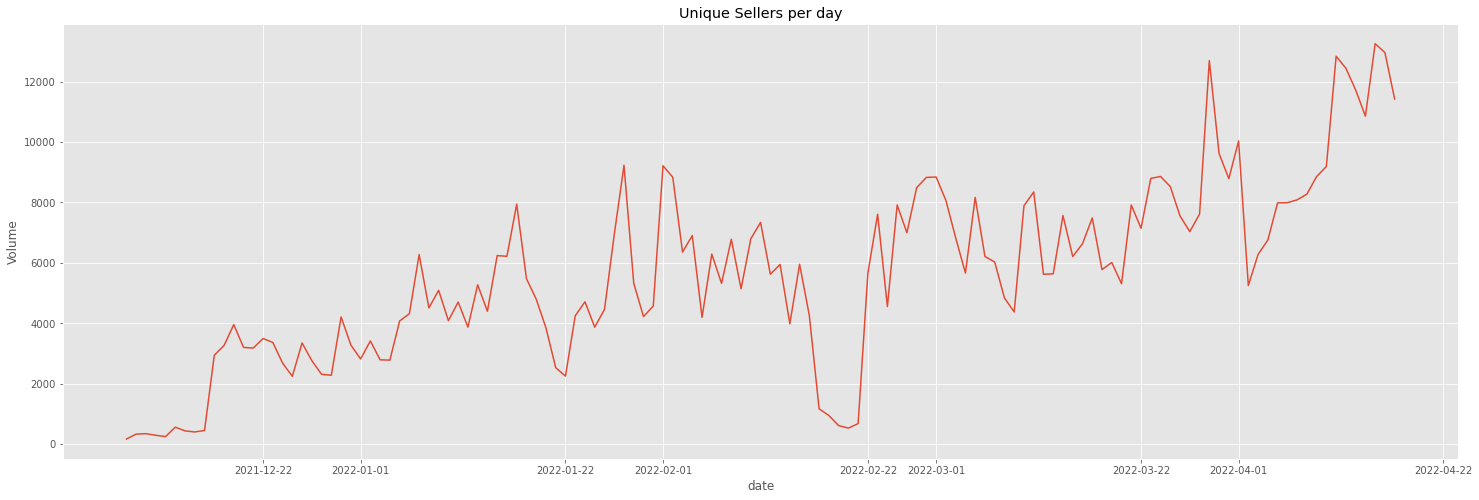

In [14]:
fig, ax = plt.subplots(figsize=(25, 8))

df_plot = trade_master.copy()
df_plot["date"] = df_plot["tradeTime"].dt.date
df_plot = df_plot.groupby("date")["seller"].nunique().reset_index().iloc[:-5]
g = sns.lineplot(
    data=df_plot,
    x="date",
    y="seller",
)
g.set_title("Unique Sellers per day")
g.set_ylabel("Volume")
pass

In [15]:
df_plot.head()

,date,seller
0,2021-12-08,166
1,2021-12-09,330
2,2021-12-10,343
3,2021-12-11,290
4,2021-12-12,246


Text(0.5, 0.98, '20% of Sellers(39,670) responsible for 71.78% (848,215) of all Sales')

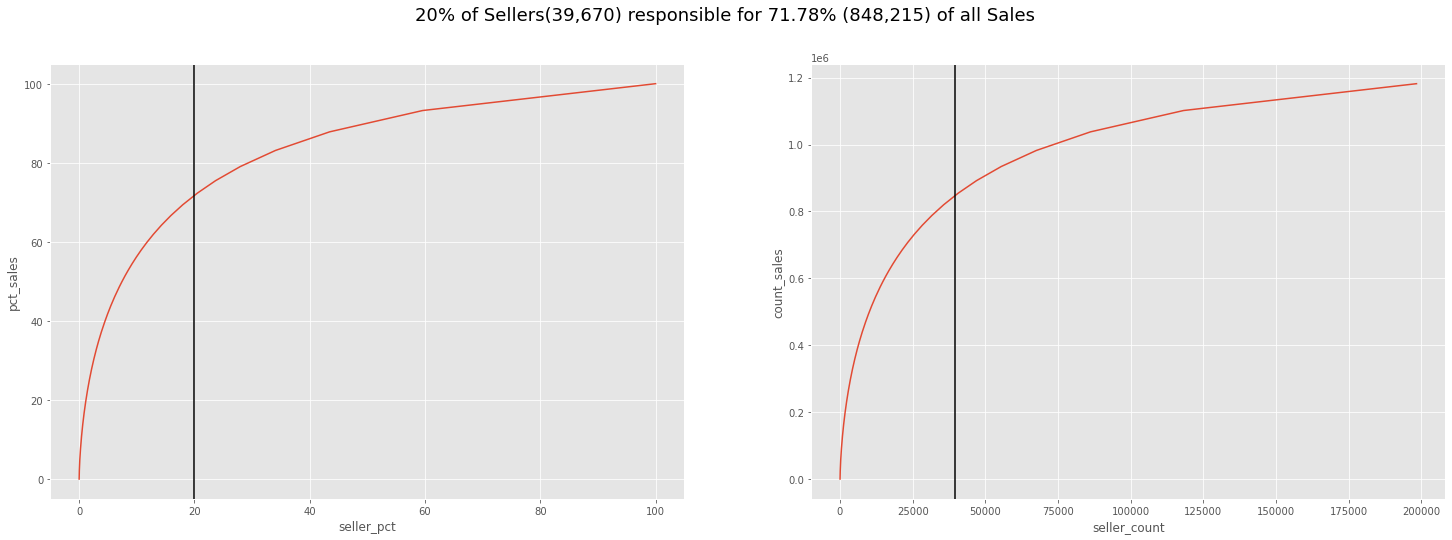

In [16]:
df_plot = trade_master.copy()
df_plot = df_plot.groupby("seller")["signature"].nunique().reset_index()

df_plot = df_plot.sort_values("signature", ascending=False)

df_plot["cumsum"] = df_plot["signature"].cumsum()
df_plot["cumsum_pct"] = df_plot["cumsum"] / df_plot["signature"].sum() * 100
df_plot["seller_count"] = list(range(1, df_plot.shape[0] + 1))
df_plot["seller_pct"] = df_plot["seller_count"] / df_plot.shape[0] * 100

pareto_seller_count = df_plot[df_plot["seller_pct"] > 20].iloc[0]["seller_count"]
pareto_trx_count = df_plot[df_plot["seller_pct"] > 20].iloc[0]["cumsum"]
pareto_trx_pct = df_plot[df_plot["seller_pct"] > 20].iloc[0]["cumsum_pct"]


fig, ax = plt.subplots(1, 2, figsize=(25, 8))
g = df_plot.set_index("seller_pct")["cumsum_pct"].plot(ax=ax[0])
ax[0].set_ylabel("pct_sales")
g.axvline(20, color="black")

g = df_plot.set_index("seller_count")["cumsum"].plot(ax=ax[1])
ax[1].set_ylabel("count_sales")
g.axvline(pareto_seller_count, color="black")

fig.suptitle(
    f"20% of Sellers({pareto_seller_count:,}) responsible for {pareto_trx_pct:0.2f}% ({pareto_trx_count:,}) of all Sales",
    fontsize=18,
)

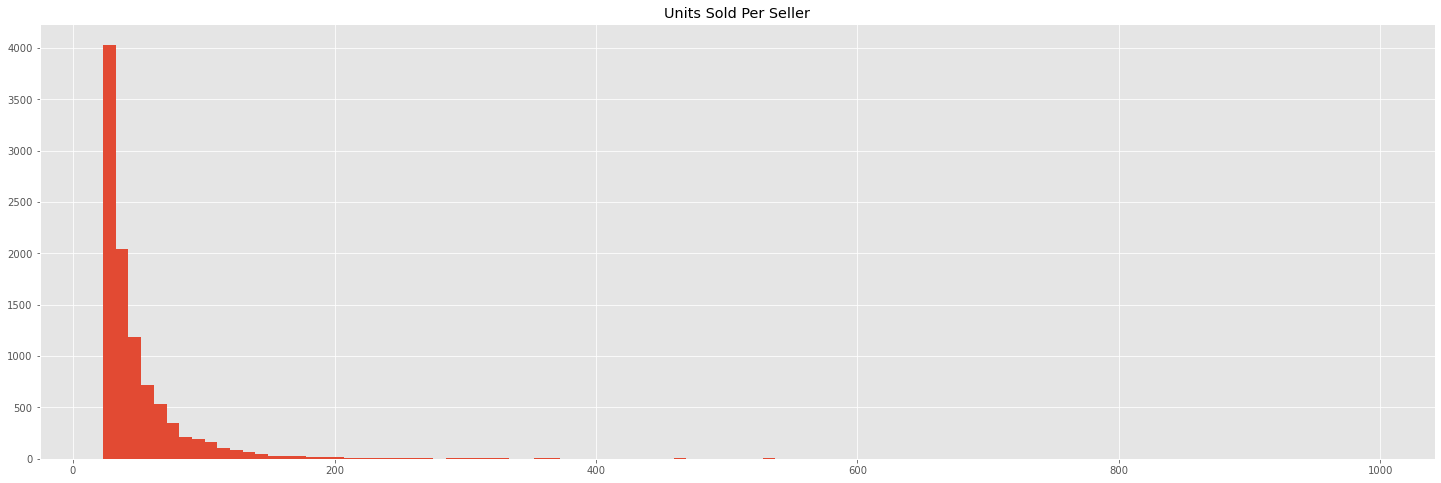

In [17]:
fig, ax = plt.subplots(figsize=(25, 8))
# Units per Seller
g = (
    trade_master.groupby("seller")
    .size()
    .sort_values(ascending=False)
    .iloc[:10000]
    .hist(bins=100)
)
g.set_title("Units Sold Per Seller")
pass

In [18]:
all_traders = trade_master.seller.to_list()
all_traders.extend(trade_master.buyer.to_list())
all_traders = np.unique(all_traders)

In [19]:
all_traders.shape

(267471,)

### Organize each traders data

In [20]:
buyers = trade_master.sort_values("buyer")
buyers = buyers.set_index("buyer")


sellers = trade_master.sort_values("seller")
sellers = sellers.set_index("seller")

In [21]:
trader_buys_dfs = {}
trader_sells_dfs = {}

for trader in tqdm.tqdm(all_traders):
    try:
        trader_buys_dfs[trader] = buyers.loc[trader].copy().sort_values("tradeTime")
    except:
        pass

    try:
        trader_sells_dfs[trader] = sellers.loc[trader].copy().sort_values("tradeTime")
    except:
        pass

100%|██████████| 267471/267471 [02:48<00:00, 1590.48it/s]


In [22]:
trader_trades = []
hodling = []


for trader in tqdm.tqdm(all_traders):
    try:
        _trader_purchases = trader_buys_dfs[trader]
    except:
        continue

    try:
        # Didn't aquire on a mp, but sold on mp or is holding
        _trader_sales = trader_sells_dfs[trader]
    except:
        pass

    for i, row in _trader_purchases.iterrows():
        mint_id = row["mint"]
        buy_price = row["price"]
        buy_time = row["tradeTime"]
        collection = row["collection"]

        try:
            sale = _trader_sales.loc[
                (_trader_sales.mint == mint_id) & (_trader_sales.tradeTime > buy_time)
            ].iloc[0]
        except:
            # Bought NFT but didn't sell
            hodling.append(
                {
                    "trader": trader,
                    "mint": mint_id,
                    "collection": collection,
                    "buy_trx": row["signature"],
                    "buy_price": buy_price,
                    "hold_time": (time.time() - int(buy_time.timestamp())) / 60 / 1440,
                }
            )
            continue

        sell_price = sale["price"]
        trader_trades.append(
            {
                "trader": trader,
                "mint": mint_id,
                "buy_trx": row["signature"],
                "sell_trx": sale["signature"],
                "buy_dex": row["dex"],
                "sell_trx": sale["dex"],
                "same_dex": 1 if row["dex"] == sale["dex"] else 0,
                "hold_time": (sale["tradeTime"].timestamp() - buy_time.timestamp())
                / 60
                / 1440,
                "buy_price": buy_price,
                "sell_price": sell_price,
                "collection": collection,
                "profit_sol": (sell_price * 0.92) - buy_price,
            }
        )

100%|██████████| 267471/267471 [13:40<00:00, 325.90it/s]


In [23]:
trade_r = pd.DataFrame(trader_trades)
hodl_r = pd.DataFrame(hodling)

### Population Stats

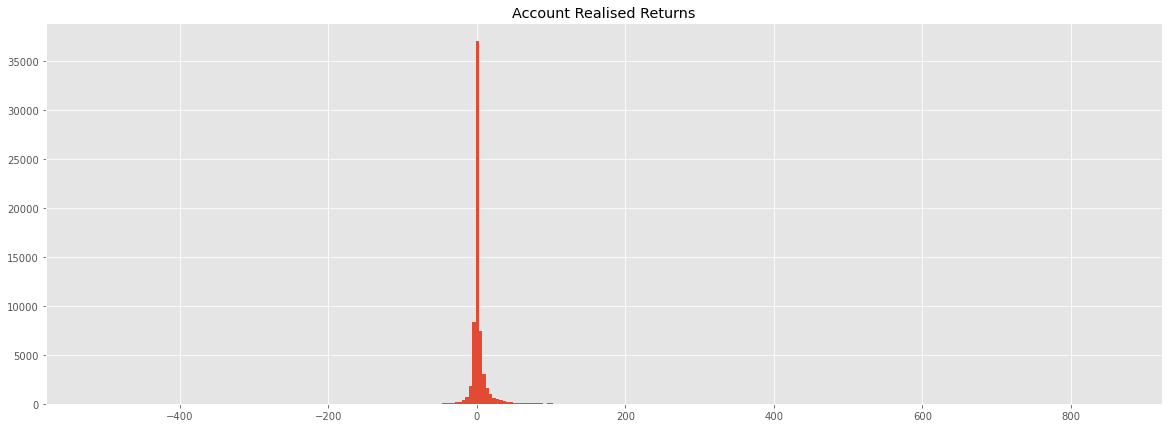

In [24]:
fig, ax = plt.subplots(figsize=(20, 7))
trade_r.groupby("trader").profit_sol.sum().hist(bins=300)
# ax.set_yscale("log")
ax.set_title("Account Realised Returns")
pass

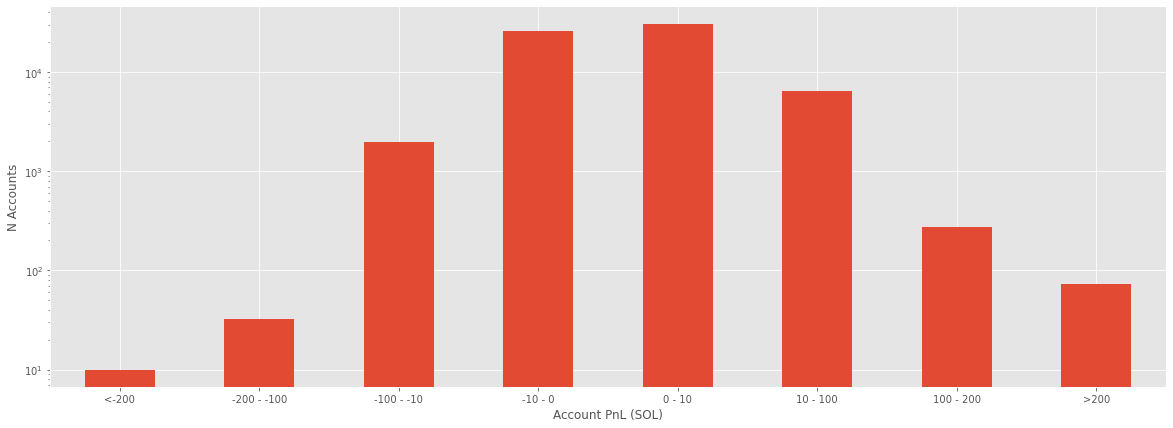

In [25]:
fig, ax = plt.subplots(figsize=(20, 7))

return_plot = pd.cut(
    trade_r.groupby("trader").profit_sol.sum(),
    [-float("inf"), -200, -100, -10, 0, 10, 100, 200, float("inf")],
    labels=[
        "<-200",
        "-200 - -100",
        "-100 - -10",
        "-10 - 0",
        "0 - 10",
        "10 - 100",
        "100 - 200",
        ">200",
    ],
).value_counts()


return_plot[
    [
        "<-200",
        "-200 - -100",
        "-100 - -10",
        "-10 - 0",
        "0 - 10",
        "10 - 100",
        "100 - 200",
        ">200",
    ]
].plot(kind="bar")
ax.set_yscale("log")
plt.xticks(rotation=0)

ax.set_xlabel("Account PnL (SOL)")
ax.set_ylabel("N Accounts")


pass

In [26]:
bad_traders = trade_r.groupby("trader").profit_sol.sum()
bad_traders[bad_traders < 0].shape[0]

27665

In [27]:
bad_traders[bad_traders > 0].shape[0]

37514

### Best/Worst Flip

In [28]:
trade_r.sort_values("profit_sol", ascending=False).head(5)

,trader,mint,buy_trx,sell_trx,buy_dex,same_dex,hold_time,buy_price,sell_price,collection,profit_sol
379187,GTPPHsHz4dBHJHph1HnTq1Bo35AcKebX7tgbpjE31iNs,9pTA62JdJ41HdVWMya8GXLmqTTo2wzkcbzJs19cZ77QX,2V2jrYLdtd9coJiMqGc7miZjhqpRxca37arGKKba1HTSfd...,magiceden,magiceden,1,78.373924,7.5,283.332039,DeGods,253.165476
333959,EjawQWmh94JamZAYHFxrLZzfiqn2yTUAeGT8eGZNxkr4,GpiAsNzY9N9gw844dBPBWwwZSCa9xHdPD6NXopyhv5aA,1v7MiGrov6W5rRwKnmqq65d5YrkG6uRbWcRYfE3fLVDKzG...,magiceden,magiceden,1,24.379097,15.0,270.000000,Mindfolk Founders,233.400000
218955,AKQ73VFLUaMe3FdfJ7vwzaAa9GKpR85zc4Q5w37d4uKA,AgKSybyAsKAZuen6yGUdZbUVwREWan28BXHob3xpEprT,bUs9KeKCU2fVnjLVfMyYTZCRmkAEyu8NPX59YqQVWW68AW...,magiceden,magiceden,1,89.898808,4.4,250.002039,DeGods,225.601876
366028,Fxqfyqmgq92mCJscameC5x581RSFK5h5RKLpqRHz1pm4,CVXaw6Lxvd8zv2nVvfxDkw3vyKLuRhj38e2NcmGwUnji,3WiknQdWVeZXsMRnADBN4v4WCREW45E3u8GpUh3uHcNPQz...,magiceden,magiceden,1,27.471852,3.0,240.000000,Mindfolk Founders,217.800000
333878,EjSUh8D9zAB9zXCLR4wtrxkWpzHFhJULsSLoi8pAE9kJ,3zcgdAKxXzepNdCzPDtEAgyERUPhY3RBhjcQhGAf1AQ2,5oSC4t8mtHjLwMSD2fgkcUfFakmJziNni2nR9JXNFSKeGs...,magiceden,magiceden,1,40.517859,170.0,415.000000,Genesis,211.800000


### Wash Traders

In [29]:
a = trade_r.groupby("trader").agg(
    n_trades=("buy_trx", pd.Series.nunique), total_pnl_SOL=("profit_sol", "sum")
)

In [30]:
b = a[a.total_pnl_SOL < 0][["n_trades", "total_pnl_SOL"]]

Text(0.5, 1.0, 'Negative PnL Traders')

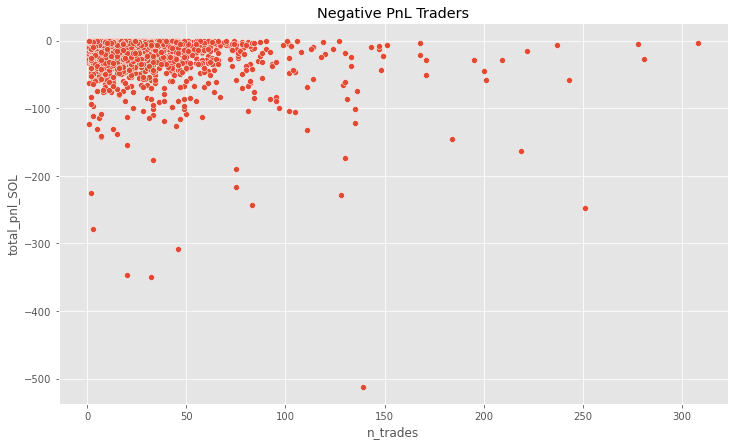

In [31]:
from sklearn.decomposition import PCA

fig, ax = plt.subplots(figsize=(12, 7))

# pca = PCA(2)
# pca_coords = pca.fit_transform(scaled_f)

# centroids = km.cluster_centers_


sns.scatterplot(
    x=b["n_trades"],
    y=b["total_pnl_SOL"],
)

plt.title("Negative PnL Traders")

In [32]:
trade_r.trader.nunique()

65179

In [33]:
hodl_r.trader.nunique()

102230

### Cluster Analysis

In [34]:
trader_agg = trade_r.groupby("trader").agg(
    n_flips=("mint", pd.Series.nunique),
    trade_profit=("profit_sol", pd.Series.median),
    total_pnl=("profit_sol", pd.Series.sum),
    flip_duration=("hold_time", pd.Series.median),
    n_collections_flipped=("collection", pd.Series.nunique),
)
trader_agg

,n_flips,trade_profit,total_pnl,flip_duration,n_collections_flipped
trader,,,,,
11kkjAjRAnmS2j4LjdBdnnXPdWSi9YG61L7WBXgRb3e,21,1.321837,15.157013,1.372558,7
121C7swA7MaembPRxGgC4eQ6TFiPYsy3PPZpUyWF5yNT,4,-0.664000,-2.058200,12.299497,2
121H2JwGqzxGrw8k1A6W7r5ydYPxD7FbMx9oXdtDmWXe,2,0.130837,0.261674,24.472477,2
121HQqLEzHN4jawTHjYVdzZfb8Li6HS8dS7h3sitcZRi,5,-0.008563,4.538184,1.335914,5
122gkXqwRLwuerEywDRf83zQ9QMvgLHBq7m3FAx6qKKY,4,-0.135000,-0.466000,0.140069,2
...,...,...,...,...,...
zwG9T9EztCDgXf1Sx9YKs4sgGWReYFaL3ztdgf3Lz6K,10,-0.230944,-3.253500,2.715266,9
zwukom3tNS7SVdwcUEhnu3eP73DBDv5QdAw96mucxN9,3,-0.764163,-2.672689,11.305394,3
zxBesBJvRr2c5ME317HfzNetzYDtcYsCqmj7P5EqjQC,3,-3.106000,-9.981887,13.177789,3


In [35]:
trader_agg_hodl = hodl_r.groupby("trader").agg(
    n_unsold=("mint", pd.Series.nunique),
    hodl_time=("hold_time", pd.Series.median),
    n_collections_hodled=("collection", pd.Series.nunique),
)
trader_agg_hodl

,n_unsold,hodl_time,n_collections_hodled
trader,,,
112uNfcC8iwX9P2TkRdJKyPatg6a4GNcr9NC5mTc2z3,2,38.151536,2
11kkjAjRAnmS2j4LjdBdnnXPdWSi9YG61L7WBXgRb3e,21,30.511970,16
121GT9ioNtSwhEV1kDWMS6mzzWq77a5KoPHwmqAPeX1q,6,69.565946,1
121HQqLEzHN4jawTHjYVdzZfb8Li6HS8dS7h3sitcZRi,3,13.677121,3
122gkXqwRLwuerEywDRf83zQ9QMvgLHBq7m3FAx6qKKY,3,65.709251,2
...,...,...,...
zwrtf61PCCdczYwQvSDAF6AW88As2FeuXHnWbuYUWND,2,96.645213,1
zx22uZ2DqvX8ugVMX4b5yNUzcFBhXMxtmk1tE2bAZnY,2,13.882192,1
zxBesBJvRr2c5ME317HfzNetzYDtcYsCqmj7P5EqjQC,3,53.405647,3


In [36]:
# cluster_data = trader_agg.join(trader_agg_hodl, how="outer").fillna(0)
# cluster_data

In [37]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#### Reduce correlated features

In [38]:
reduced_f = PCA(2).fit_transform(trader_agg)

#### Scale

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaled_f = StandardScaler().fit_transform(reduced_f)
scaled_f = reduced_f

#### Pick N Clusters

In [40]:
distorsions = []

for i in range(2, 10):
    km = KMeans(i)
    cluster = km.fit_predict(scaled_f)
    distorsions.append(km.inertia_)

Text(0.5, 1.0, 'Elbow curve')

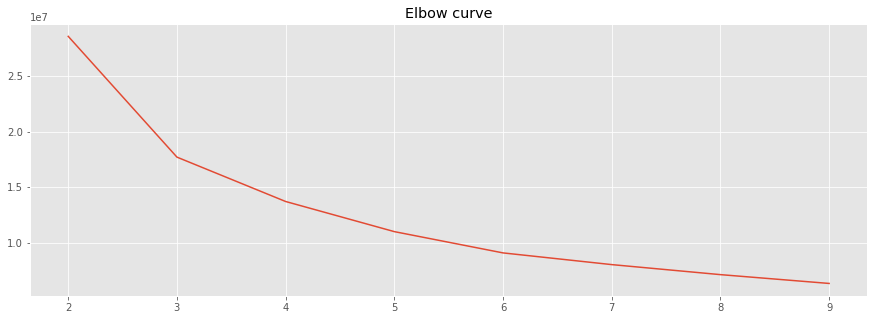

In [41]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.title("Elbow curve")

In [42]:
km = KMeans(3)

In [43]:
cluster = km.fit_predict(scaled_f)

In [44]:
clean_c_names = [
    str(x).replace("2", "Cohort 3").replace("1", "Cohort 2").replace("0", "Cohort 1")
    for x in cluster
]

Text(0.5, 1.0, 'Trader Cohorts')

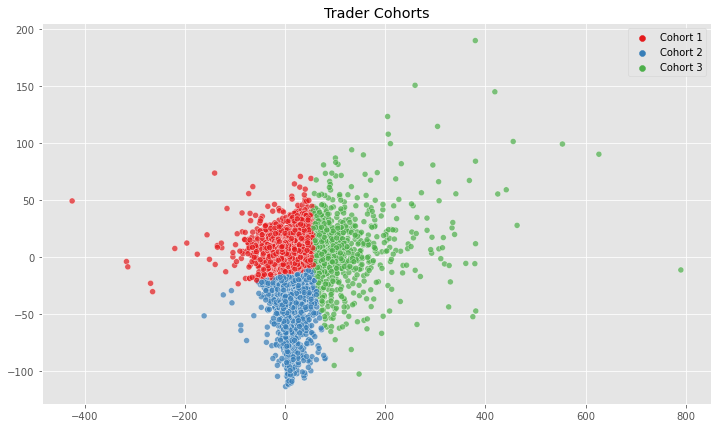

In [45]:
fig, ax = plt.subplots(figsize=(12, 7))

pca = PCA(2)
pca_coords = pca.fit_transform(scaled_f)

# centroids = km.cluster_centers_


g = sns.scatterplot(
    x=pca_coords[:, 0], y=pca_coords[:, 1], hue=clean_c_names, palette="Set1", alpha=0.7
)
g.set_title("Trader Cohorts")

# plt.scatter(centroids[:, 0], centroids[:, 1], s=80, color="k")

In [46]:
trader_agg["cohort"] = clean_c_names
trader_cluster_mapper = trader_agg["cohort"].to_dict()
trader_agg_hodl["cohort"] = trader_agg_hodl.index.map(trader_cluster_mapper)

In [47]:
trader_agg.groupby("cohort").median().add_prefix("med_").join(
    pd.Series(trader_agg.groupby("cohort").size(), name="n_traders")
)

,med_n_flips,med_trade_profit,med_total_pnl,med_flip_duration,med_n_collections_flipped,n_traders
cohort,,,,,,
Cohort 1,3,0.033876,0.198637,3.119456,2,56607
Cohort 2,2,0.224307,0.701652,42.074936,2,7708
Cohort 3,30,0.703028,87.188940,8.740428,11,864


In [48]:
trader_agg_hodl.groupby("cohort").median().join(
    pd.Series(trader_agg_hodl.groupby("cohort").size(), name="n_traders")
)

,n_unsold,hodl_time,n_collections_hodled,n_traders
cohort,,,,
Cohort 1,3,34.521844,2,43823
Cohort 2,4,54.632059,2,6290
Cohort 3,22,42.642713,9,835


In [49]:
best_trade_group = trader_agg[trader_agg.cohort == "Cohort 3"]
best_trade_group

,n_flips,trade_profit,total_pnl,flip_duration,n_collections_flipped,cohort
trader,,,,,,
12u2P1vtnNVBXm4hFPdANednF8sWq4NsE5bF4cmwkVmt,153,0.088000,45.825051,0.385174,40,Cohort 3
12xGbX3EfL5MKM2wcd9VJjrwCEc748xWTFkjVPjooS1d,8,9.964837,222.889100,34.457963,6,Cohort 3
13bpzqMuRJstF3ijuQN29Gomh8KT6NaSe2KkQcrqCrRw,14,1.180938,158.721293,36.437014,2,Cohort 3
149cL7ze5oJS2xw43FT559LFc9fKdAkD4c768VGFP3bt,136,-0.135000,99.420375,3.433652,66,Cohort 3
22KkEFc8pngB1q47RhrDvnjEcQQfcN9FyU4Q3q7CYT64,227,0.732637,392.124098,7.069919,49,Cohort 3
...,...,...,...,...,...,...
wxo1Rj8JAy52FhhqTSiPTNbGZH87RhyMrgKJZiyYcay,61,0.065961,56.200181,5.102836,10,Cohort 3
xKAzNHBSRT9uGT7BrCxTifQvtWFaT32NYGsr7rrHNbF,18,5.344876,97.400119,26.302176,9,Cohort 3
ypT5t3FU5Anww1swoSree5pRiJ5UeJhY1McJGcDK994,40,2.154923,128.243633,27.268524,10,Cohort 3


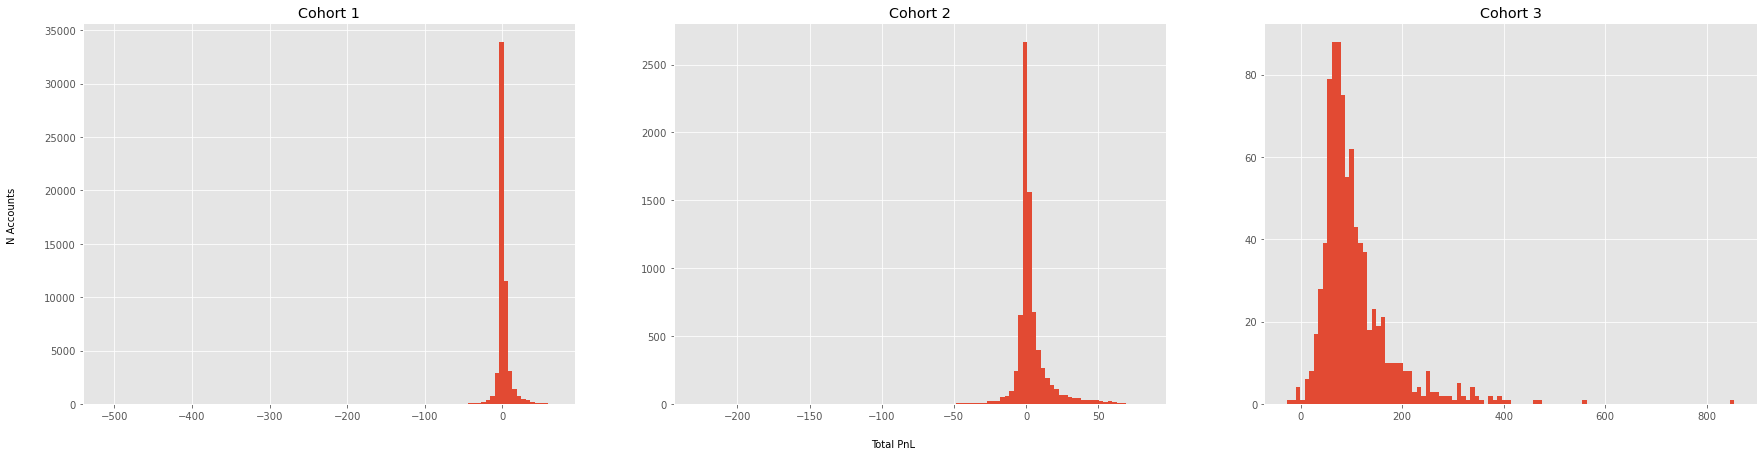

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(30, 7))
trader_agg[trader_agg.cohort == "Cohort 1"].total_pnl.hist(
    bins=100, ax=ax[0]
).set_title("Cohort 1")
trader_agg[trader_agg.cohort == "Cohort 2"].total_pnl.hist(
    bins=100, ax=ax[1]
).set_title("Cohort 2")
trader_agg[trader_agg.cohort == "Cohort 3"].total_pnl.hist(
    bins=100, ax=ax[2]
).set_title("Cohort 3")

fig.text(0.5, 0.04, "Total PnL", ha="center")
fig.text(0.09, 0.5, "N Accounts", va="center", rotation="vertical")


pass

<AxesSubplot:>

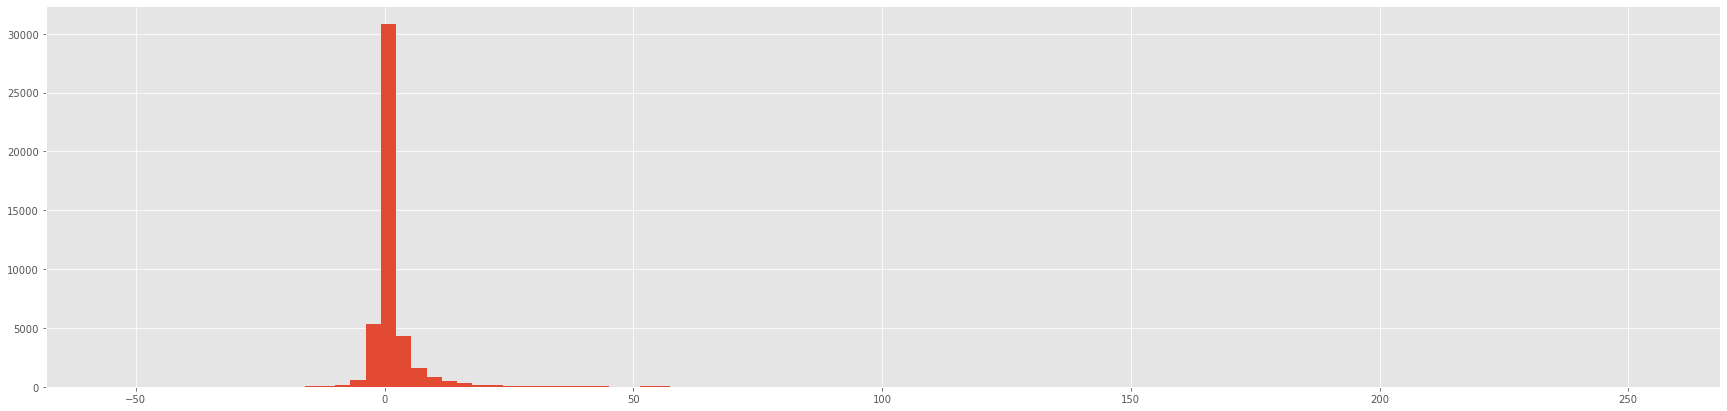

In [51]:
fig, ax = plt.subplots(figsize=(30, 7))
trade_r[trade_r.trader.isin(best_trade_group.index.to_list())].profit_sol.hist(bins=100)

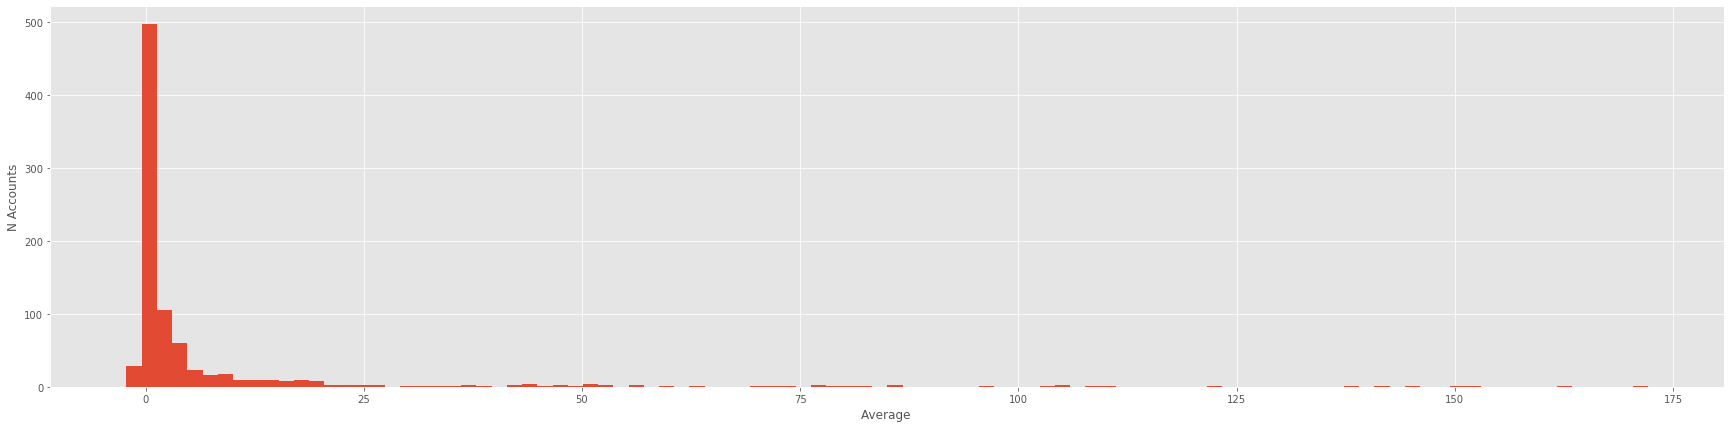

In [52]:
fig, ax = plt.subplots(figsize=(30, 7))
trader_agg[trader_agg.cohort == "Cohort 3"].trade_profit.hist(bins=100, ax=ax)

ax.set_xlabel("Average ")
ax.set_ylabel("N Accounts")
pass

### Top by unit count & top by SOL spent & weighted by best performing wallets

In [54]:
best_trader_hodls = hodl_r[hodl_r.trader.isin(best_trade_group.index)]

collection_stats = (
    pd.DataFrame(best_trader_hodls)
    .groupby("collection")
    .agg(
        n_held_by_entire_cohort=("mint", pd.Series.nunique),
        n_cohort_accounts_holding=("trader", pd.Series.nunique),
        avg_days_since_buy=("hold_time", "mean"),
        avg_buy_price=("buy_price", "mean"),
    )
)

creation_mapper = (
    df.drop_duplicates(subset="collection")
    .set_index("collection")
    .createdTime.to_dict()
)

collection_stats["project_age_days"] = (
    (time.time() - collection_stats.index.to_series().map(creation_mapper)) / 60 / 1440
)

df_holding = (
    collection_stats[(collection_stats.avg_days_since_buy < 30)]
    .sort_values("n_held_by_entire_cohort", ascending=False)
    .head(20)
)

In [55]:
df_holding

,n_held_by_entire_cohort,n_cohort_accounts_holding,avg_days_since_buy,avg_buy_price,project_age_days
collection,,,,,
Honey Genesis Bees,294,72,27.769087,4.727509,64.659027
Crusader,279,59,12.102134,7.331649,NaN
Grim Syndicate,276,67,19.385776,7.834734,NaN
Stoner Cups,247,29,9.527124,0.618420,11.778101
Project TENJIN,247,48,23.419228,4.497127,NaN
OG Atadians,231,99,25.003046,7.980300,49.539814
TombStoned High Society,226,96,16.631545,12.250049,21.719872
Astrals,217,69,29.424780,10.842066,43.931377
Fellow Apes,187,43,10.814438,3.677376,13.749235


### Weighting by Trader PnL

In [56]:
a = best_trade_group.sort_values("total_pnl", ascending=False)

a["weight"] = np.linspace(1, 0, a.shape[0]) ** 3
weight_mapper = a["weight"].to_dict()

In [57]:
best_trader_hodls_weighted = hodl_r[hodl_r.trader.isin(best_trade_group.index)]
best_trader_hodls_weighted["weight"] = best_trader_hodls_weighted["trader"].map(
    weight_mapper
)

collection_stats = (
    pd.DataFrame(best_trader_hodls_weighted)
    .groupby("collection")
    .agg(
        n_held_by_entire_cohort=("mint", pd.Series.nunique),
        n_cohort_accounts_holding=("trader", pd.Series.nunique),
        avg_days_since_buy=("hold_time", "mean"),
        avg_buy_price=("buy_price", "mean"),
        weight=("weight", "sum"),
    )
)

collection_stats["project_age_days"] = (
    (time.time() - collection_stats.index.to_series().map(creation_mapper)) / 60 / 1440
)

df_holding = (
    collection_stats[(collection_stats.avg_days_since_buy < 30)]
    .sort_values("weight", ascending=False)
    .head(20)
).copy()

<ipython-input-57-6a29a763d233>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_trader_hodls_weighted["weight"] = best_trader_hodls_weighted["trader"].map(


In [58]:
df_holding

,n_held_by_entire_cohort,n_cohort_accounts_holding,avg_days_since_buy,avg_buy_price,weight,project_age_days
collection,,,,,,
Stoner Cups,247,29,9.527124,0.618420,103.374185,11.778198
Honey Genesis Bees,294,72,27.769087,4.727509,92.311958,64.659124
Fellow Apes,187,43,10.814438,3.677376,84.641932,13.749332
Grim Syndicate,276,67,19.385776,7.834734,84.512096,NaN
TombStoned High Society,226,96,16.631545,12.250049,78.379584,21.719969
OG Atadians,231,99,25.003046,7.980300,67.249033,49.539911
Crusader,279,59,12.102134,7.331649,61.932580,NaN
Project TENJIN,247,48,23.419228,4.497127,60.411305,NaN
Degen Dojo,165,65,10.001161,11.993850,60.082851,15.584761
